<a href="https://colab.research.google.com/github/konrado10/NaukaGIT/blob/master/Zad131.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CASE STUDIES

## Case Study I (Zad 22, 23, 24, 25)

In [18]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [19]:
url = 'https://storage.googleapis.com/esmartdata-courses-files/ml-course/OnlineRetail.csv'
raw_data = pd.read_csv(url, encoding='latin', parse_dates=['InvoiceDate'])
data = raw_data.copy()
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [20]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 160.7 MB


In [21]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [22]:
data.describe(include = ['object'])

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [23]:
data.describe(include = ['datetime'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,InvoiceDate
count,541909
unique,23260
top,2011-10-31 14:41:00
freq,1114
first,2010-12-01 08:26:00
last,2011-12-09 12:50:00


In [24]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [25]:
data = data.dropna()
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [26]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 123.7 MB


In [27]:
data.Country.value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [28]:
tmp = data.Country.value_counts().nlargest(10).reset_index()
tmp.columns = ['Country', 'Count']

In [29]:
px.bar(tmp, x = 'Country', y = 'Count', template='plotly_dark', color_discrete_sequence=['#03fcb5'],
       title='Czestotliwość zakupów ze względu na kraj')

In [30]:
data_uk = data.query("Country == 'United Kingdom'").copy()
data_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [31]:
data_uk['Sales'] = data_uk['Quantity']* data_uk.UnitPrice
data_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [33]:
tmp = data_uk.groupby(by=data_uk.InvoiceDate.dt.date)['CustomerID'].count().reset_index()
tmp.columns = ['InvoiceDate', 'Count']
tmp.head()

,InvoiceDate,Count
0,2010-12-01,1809
1,2010-12-02,2029
2,2010-12-03,937
3,2010-12-05,2492
4,2010-12-06,1915


In [34]:
from plotly.subplots import make_subplots

fig = make_subplots(rows = 2, cols=1, shared_xaxes=True, vertical_spacing=0.02)

trace1 = px.line(tmp, x='InvoiceDate', y='Count', template='plotly_dark', color_discrete_sequence=['#498c4a'])['data'][0]
trace2 = px.scatter(tmp, x='InvoiceDate', y='Count', template='plotly_dark', color_discrete_sequence=['#498c4a'])['data'][0]

fig.add_trace(trace1, row=1,col=1)
fig.add_trace(trace2, row=2,col=1)

fig.update_layout(template='plotly_dark', title='Częstotliwość zakupów ze względu na dzień', width=1000)
fig.show()

In [35]:
tmp = data_uk.groupby(data_uk['InvoiceDate'].dt.date)["Sales"].sum().reset_index()
tmp.columns = ['InvoiceDate', 'Sales']
tmp.head()

,InvoiceDate,Sales
0,2010-12-01,42030.85
1,2010-12-02,45622.08
2,2010-12-03,17512.44
3,2010-12-05,25458.85
4,2010-12-06,29007.74


In [36]:
from plotly.subplots import make_subplots

fig = make_subplots(rows = 2, cols=1, shared_xaxes=True, vertical_spacing=0.02)

trace1 = px.line(tmp, x='InvoiceDate', y='Sales', template='plotly_dark', color_discrete_sequence=['#498c4a'])['data'][0]
trace2 = px.scatter(tmp, x='InvoiceDate', y='Sales', template='plotly_dark', color_discrete_sequence=['#498c4a'])['data'][0]

fig.add_trace(trace1, row=1,col=1)
fig.add_trace(trace2, row=2,col=1)

fig.update_layout(template='plotly_dark', title='Łączna sprzedaż ze względu na dzień', width=1000)
fig.show()

In [37]:
data_user = pd.DataFrame(data['CustomerID'].unique(), columns = ['CustomerID'])
data_user.head()

,CustomerID
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0


In [38]:
last_purchase = data_uk.groupby('CustomerID')['InvoiceDate'].max().reset_index()
last_purchase.columns = ['CustomerID', 'LastPurchaseDate']
last_purchase.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18 10:17:00
1,12747.0,2011-12-07 14:34:00
2,12748.0,2011-12-09 12:20:00
3,12749.0,2011-12-06 09:56:00
4,12820.0,2011-12-06 15:12:00


In [39]:
last_purchase.LastPurchaseDate.max()

Timestamp('2011-12-09 12:49:00')

In [42]:
last_purchase['Retention'] = (last_purchase.LastPurchaseDate.max() - last_purchase.LastPurchaseDate).dt.days
last_purchase.head()

,CustomerID,LastPurchaseDate,Retention
0,12346.0,2011-01-18 10:17:00,325
1,12747.0,2011-12-07 14:34:00,1
2,12748.0,2011-12-09 12:20:00,0
3,12749.0,2011-12-06 09:56:00,3
4,12820.0,2011-12-06 15:12:00,2


In [43]:
last_purchase.Retention.value_counts()

3      114
8       97
0       97
2       92
1       77
      ... 
243      1
370      1
285      1
295      1
174      1
Name: Retention, Length: 348, dtype: int64

In [45]:
px.histogram(last_purchase, x = 'Retention', template='plotly_dark', width = 1000, height=600, title = 'Retention', nbins = 100, color_discrete_sequence = ['#498c4a'])

In [46]:
data_user = pd.merge(data_user, last_purchase, on = 'CustomerID')
data_user = data_user[['CustomerID', 'Retention']]
data_user.head()

,CustomerID,Retention
0,17850.0,301
1,13047.0,31
2,13748.0,95
3,15100.0,329
4,15291.0,25


In [47]:
px.scatter(data_user, x='CustomerID', y = 'Retention', template='plotly_dark', width=1000, height=600, color_discrete_sequence=['#498c4a'])

In [50]:
data_retention = pd.DataFrame(data_user['Retention'])
data_retention.head()

,Retention
0,301
1,31
2,95
3,329
4,25


In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_user['RetentionScaled'] = scaler.fit_transform(data_retention)
data_user.head()

,CustomerID,Retention,RetentionScaled
0,17850.0,301,2.097649
1,13047.0,31,-0.596486
2,13748.0,95,0.042124
3,15100.0,329,2.377041
4,15291.0,25,-0.656356


In [52]:
px.scatter(data_user, x='CustomerID', y = 'RetentionScaled', template='plotly_dark', width=1000, height=600, color_discrete_sequence=['#498c4a'])

In [56]:
data_retention_scale = pd.DataFrame(data_user['RetentionScaled'])
data_retention_scale

,RetentionScaled
0,2.097649
1,-0.596486
2,0.042124
3,2.377041
4,-0.656356
...,...
3945,-0.895835
3946,-0.895835
3947,-0.895835
3948,-0.905813


In [58]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, max_iter = 1000)
    kmeans.fit(data_retention_scale)
    wcss.append(kmeans.inertia_)

wcss = pd.DataFrame(data = np.c_[range(1,10), wcss], columns = ['NumberOfClusters', 'WCSS'])
wcss

,NumberOfClusters,WCSS
0,1.0,3950.000000
1,2.0,814.413936
2,3.0,387.846731
3,4.0,221.025615
4,5.0,136.586837
5,6.0,94.573054
6,7.0,71.026115
7,8.0,54.248044
8,9.0,40.944068


In [59]:
fig = px.line(wcss, x = 'NumberOfClusters', y = 'WCSS', template = 'plotly_dark', title = 'WCSS', width = 1000, color_discrete_sequence=['#498c4a'])
fig.add_trace(px.scatter(wcss, x = 'NumberOfClusters', y = 'WCSS', template = 'plotly_dark', title = 'WCSS', width = 1000, color_discrete_sequence=['#498c4a'])['data'][0])

In [60]:
kmeans = KMeans(n_clusters=3, max_iter=1000)
kmeans.fit(data_retention_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [61]:
data_user['Cluster'] = kmeans.labels_
data_user.head()

,CustomerID,Retention,RetentionScaled,Cluster
0,17850.0,301,2.097649,2
1,13047.0,31,-0.596486,1
2,13748.0,95,0.042124,0
3,15100.0,329,2.377041,2
4,15291.0,25,-0.656356,1


In [63]:
tmp = data_user.groupby('Cluster')['Retention'].describe()
tmp

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,735.0,153.185034,38.155512,92.0,119.0,153.0,185.00,222.0
1,2651.0,30.307808,24.994104,0.0,9.0,24.0,49.00,91.0
2,564.0,293.684397,45.612310,224.0,255.0,286.5,326.75,373.0


In [64]:
px.scatter(data_user, x = 'CustomerID', y = 'Retention', color = 'Cluster', template = 'plotly_dark', width = 1200, title = 'KMeans - Wizualizacja klastrów')

In [65]:
tmp = data_user.Cluster.value_counts().reset_index()
tmp.columns = ['Cluster', 'Count']
px.bar(tmp, x = 'Cluster', y = 'Count', template = 'plotly_dark', color_discrete_sequence= ['#498c4a'], width = 1200, title = 'Rozkład częstości klastrów')

In [66]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.03, min_samples = 5)
dbscan.fit(data_retention_scale)
clusters = dbscan.labels_
data_user['Cluster'] = clusters
data_user.head()

,CustomerID,Retention,RetentionScaled,Cluster
0,17850.0,301,2.097649,0
1,13047.0,31,-0.596486,1
2,13748.0,95,0.042124,1
3,15100.0,329,2.377041,0
4,15291.0,25,-0.656356,1


In [68]:
px.scatter(data_user, x = 'CustomerID', y = 'Retention', color = 'Cluster', template='plotly_dark', width = 1000, title = 'Wizualizacja klastrów')

In [69]:
data_sales = data_uk.groupby('CustomerID')['Sales'].sum().reset_index()
data_sales.head()

,CustomerID,Sales
0,12346.0,0.00
1,12747.0,4196.01
2,12748.0,29072.10
3,12749.0,3868.20
4,12820.0,942.34


In [70]:
data_user = pd.merge(data_user, data_sales, on = 'CustomerID')
data_user.head()

,CustomerID,Retention,RetentionScaled,Cluster,Sales
0,17850.0,301,2.097649,0,5288.63
1,13047.0,31,-0.596486,1,3079.10
2,13748.0,95,0.042124,1,948.25
3,15100.0,329,2.377041,0,635.10
4,15291.0,25,-0.656356,1,4596.51


In [73]:
scalar = StandardScaler()
data_user['SalesScaled'] = scalar.fit_transform(data_user[['Sales']])
data_user.head()

,CustomerID,Retention,RetentionScaled,Cluster,Sales,SalesScaled
0,17850.0,301,2.097649,0,5288.63,0.546024
1,13047.0,31,-0.596486,1,3079.10,0.208577
2,13748.0,95,0.042124,1,948.25,-0.116854
3,15100.0,329,2.377041,0,635.10,-0.164680
4,15291.0,25,-0.656356,1,4596.51,0.440321


In [74]:
px.scatter(data_user, x = 'CustomerID', y = 'Sales', template='plotly_dark', width = 1000, title = 'Sprzedaż w rozbiciu na klienta')

In [75]:
px.scatter(data_user, x = 'CustomerID', y = 'SalesScaled', template='plotly_dark', width = 1000, title = 'Sprzedaż w rozbiciu na klienta - dane przeskalowane', color_discrete_sequence=['#03fcb5'])

In [76]:
data_scaled_sales = data_user[['SalesScaled']]
data_scaled_sales.head()

,SalesScaled
0,0.546024
1,0.208577
2,-0.116854
3,-0.164680
4,0.440321


In [77]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, max_iter = 1000)
    kmeans.fit(data_retention_scale)
    wcss.append(kmeans.inertia_)

wcss = pd.DataFrame(data = np.c_[range(1,10), wcss], columns = ['NumberOfClusters', 'WCSS'])
wcss

,NumberOfClusters,WCSS
0,1.0,3950.000000
1,2.0,814.413936
2,3.0,387.846731
3,4.0,221.022421
4,5.0,136.559574
5,6.0,94.371469
6,7.0,70.982477
7,8.0,54.274494
8,9.0,40.987621


In [87]:
fig = px.line(wcss, x = 'NumberOfClusters', y = 'WCSS', template = 'plotly_dark', title = 'WCSS', width = 1400, color_discrete_sequence=['#498c4a'])
fig.add_trace(px.scatter(wcss, x = 'NumberOfClusters', y = 'WCSS', template = 'plotly_dark', title = 'WCSS', width = 1400, color_discrete_sequence=['#498c4a'])['data'][0])

In [88]:
kmeans = KMeans(n_clusters=3, max_iter = 1000)
kmeans.fit(data_scaled_sales)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [89]:
data_user['Cluster'] = kmeans.labels_
data_user['Cluster'] = data_user['Cluster'].astype(str)
data_user.head()

,CustomerID,Retention,RetentionScaled,Cluster,Sales,SalesScaled
0,17850.0,301,2.097649,0,5288.63,0.546024
1,13047.0,31,-0.596486,0,3079.10,0.208577
2,13748.0,95,0.042124,0,948.25,-0.116854
3,15100.0,329,2.377041,0,635.10,-0.164680
4,15291.0,25,-0.656356,0,4596.51,0.440321


In [90]:
kmeans.cluster_centers_

array([[-0.06065062],
       [33.63689221],
       [ 6.31619638]])

In [92]:
px.scatter(data_user, x = 'CustomerID', y = 'SalesScaled',color = 'Cluster', template='plotly_dark', width = 1000, title = 'Wizualizacja klastrów')

In [93]:
dbscan = DBSCAN(eps = 0.5, min_samples=7)
dbscan.fit(data_scaled_sales)
clusters = dbscan.labels_
data_user['Cluster'] = clusters
data_user['Cluster'] = data_user['Cluster'].astype(str)
data_user.head()

,CustomerID,Retention,RetentionScaled,Cluster,Sales,SalesScaled
0,17850.0,301,2.097649,0,5288.63,0.546024
1,13047.0,31,-0.596486,0,3079.10,0.208577
2,13748.0,95,0.042124,0,948.25,-0.116854
3,15100.0,329,2.377041,0,635.10,-0.164680
4,15291.0,25,-0.656356,0,4596.51,0.440321


In [94]:
px.scatter(data_user, x = 'CustomerID', y = 'Sales', color = 'Cluster', template = 'plotly_dark', width=1000, title = 'DBSCAN - Wizualizacja klastrów')

In [95]:
data_user.head()

,CustomerID,Retention,RetentionScaled,Cluster,Sales,SalesScaled
0,17850.0,301,2.097649,0,5288.63,0.546024
1,13047.0,31,-0.596486,0,3079.10,0.208577
2,13748.0,95,0.042124,0,948.25,-0.116854
3,15100.0,329,2.377041,0,635.10,-0.164680
4,15291.0,25,-0.656356,0,4596.51,0.440321


In [96]:
px.scatter(data_user, x = 'RetentionScaled', y = 'SalesScaled', template = 'plotly_dark', width=1000, title = 'Retenckja vs. Sprzedaż')

In [97]:
data_scaled = data_user[['RetentionScaled', 'SalesScaled']]
data_scaled.head()

,RetentionScaled,SalesScaled
0,2.097649,0.546024
1,-0.596486,0.208577
2,0.042124,-0.116854
3,2.377041,-0.164680
4,-0.656356,0.440321


In [100]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, max_iter = 1000)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

wcss = pd.DataFrame(data = np.c_[range(1,10), wcss], columns = ['NumberOfClusters', 'WCSS'])
wcss

,NumberOfClusters,WCSS
0,1.0,7900.000000
1,2.0,4714.239225
2,3.0,2458.450833
3,4.0,1383.090602
4,5.0,953.193253
5,6.0,730.303451
6,7.0,566.518045
7,8.0,444.877364
8,9.0,363.085654


In [101]:
fig = px.line(wcss, x = 'NumberOfClusters', y = 'WCSS', template = 'plotly_dark', title = 'WCSS', width = 1400, color_discrete_sequence=['#498c4a'])
fig.add_trace(px.scatter(wcss, x = 'NumberOfClusters', y = 'WCSS', template = 'plotly_dark', title = 'WCSS', width = 1400, color_discrete_sequence=['#498c4a'])['data'][0])

In [102]:
kmeans = KMeans(n_clusters=5, max_iter = 1000)
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [103]:
data_user['Cluster'] = kmeans.labels_
data_user['Cluster'] = data_user.Cluster.astype(str)
data_user.head()

,CustomerID,Retention,RetentionScaled,Cluster,Sales,SalesScaled
0,17850.0,301,2.097649,3,5288.63,0.546024
1,13047.0,31,-0.596486,0,3079.10,0.208577
2,13748.0,95,0.042124,1,948.25,-0.116854
3,15100.0,329,2.377041,3,635.10,-0.164680
4,15291.0,25,-0.656356,0,4596.51,0.440321


In [104]:
px.scatter(data_user, x = 'RetentionScaled', y = 'SalesScaled', template = 'plotly_dark', width=1000, title = 'Wizualizacja klastrów', color = 'Cluster')

In [105]:
centroids = kmeans.cluster_centers_
centroids

array([[-6.01509936e-01, -4.63209634e-04],
       [ 6.19067992e-01, -1.65265635e-01],
       [-8.70889226e-01,  3.36368922e+01],
       [ 2.02465229e+00, -2.02955850e-01],
       [-8.48160918e-01,  6.31619638e+00]])

In [107]:
fig = px.scatter(data_user, x = 'RetentionScaled', y = 'SalesScaled', color = 'Cluster', template = 'plotly_dark', width = 1000, title = 'KMeans - Wizualizacja klastrów + centroidy')
fig.add_trace(go.Scatter(x = centroids[:,0], y = centroids[:,1], mode = 'markers',marker_symbol = 'star', marker_size = 10, marker_color = 'white', showlegend = False))

In [108]:
desc = data_user.groupby('Cluster')[['Retention', 'Sales']].describe()

In [109]:
desc

Retention                         ...      Sales                        
            count        mean        std  ...        50%          75%        max
Cluster                                   ...                                   
0          2620.0   30.545038  24.959071  ...     911.63    2054.1525   21086.30
1           737.0  152.979647  38.297830  ...     391.76     771.8500    7092.06
2             2.0    3.500000   4.949747  ...  221960.33  239199.4100  256438.49
3           564.0  293.684397  45.612310  ...     249.93     391.9725   21535.90
4            27.0    5.777778   9.082245  ...   36351.42   53489.7900   88125.38

[5 rows x 16 columns]

In [110]:
tmp = pd.merge(desc['Retention'][['count', 'mean']].reset_index(), desc['Sales'][['mean']].reset_index(), on = 'Cluster', suffixes=('_Retention', '_Sales'))

In [111]:
tmp

,Cluster,count,mean_Retention,mean_Sales
0,0,2620.0,30.545038,1710.858265
1,1,737.0,152.979647,626.537098
2,2,2.0,3.500000,221960.330000
3,3,564.0,293.684397,384.475567
4,4,27.0,5.777778,43070.445185


In [112]:
px.bar(tmp, x = 'count', y = 'Cluster', hover_data = ['mean_Retention', 'mean_Sales'], template = 'plotly_dark', width = 1000, orientation='h', title = 'Rozkład klastrów')

## Case Study II (Zad 26)

In [114]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow

In [115]:
!wget https://storage.googleapis.com/esmartdata-courses-files/ml-course/green.jpg
!wget https://storage.googleapis.com/esmartdata-courses-files/ml-course/ski.jpg
!wget https://storage.googleapis.com/esmartdata-courses-files/ml-course/view.jpg

--2020-12-26 20:20:03--  https://storage.googleapis.com/esmartdata-courses-files/ml-course/green.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12300 (12K) [image/jpeg]
Saving to: ‘green.jpg’

green.jpg           100%[===================>]  12.01K  --.-KB/s    in 0s      

2020-12-26 20:20:03 (99.3 MB/s) - ‘green.jpg’ saved [12300/12300]

--2020-12-26 20:20:03--  https://storage.googleapis.com/esmartdata-courses-files/ml-course/ski.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71376 (70K) [image/jpeg]
Saving to: ‘ski.jpg’

ski.jpg             10

In [116]:
img = cv2.imread('ski.jpg')
img.shape

(460, 600, 3)

In [117]:
img

array([[[143, 100,  67],
        [143, 100,  67],
        [144, 101,  68],
        ...,
        [135,  95,  66],
        [132,  92,  63],
        [131,  91,  62]],

       [[144, 101,  68],
        [145, 102,  69],
        [145, 102,  69],
        ...,
        [133,  93,  64],
        [131,  91,  62],
        [129,  89,  60]],

       [[146, 103,  70],
        [146, 103,  70],
        [146, 103,  70],
        ...,
        [131,  93,  63],
        [130,  91,  63],
        [129,  90,  62]],

       ...,

       [[244, 244, 244],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [233, 233, 233],
        [237, 235, 235],
        [239, 237, 237]],

       [[244, 244, 244],
        [246, 246, 246],
        [248, 248, 248],
        ...,
        [233, 233, 233],
        [236, 236, 236],
        [240, 240, 240]],

       [[245, 245, 245],
        [247, 247, 247],
        [249, 249, 249],
        ...,
        [233, 233, 233],
        [237, 237, 237],
        [241, 241, 241]]

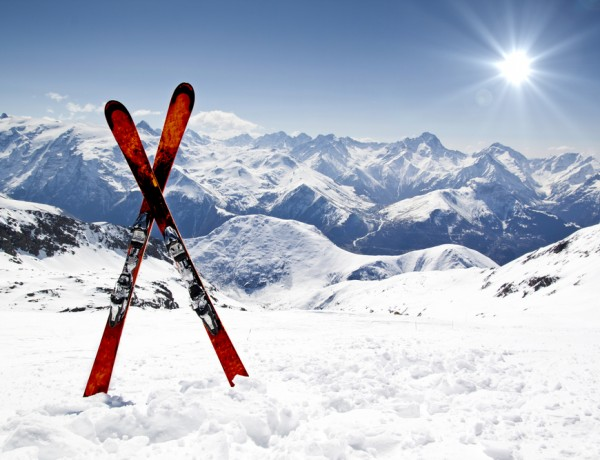

In [118]:
cv2_imshow(img)

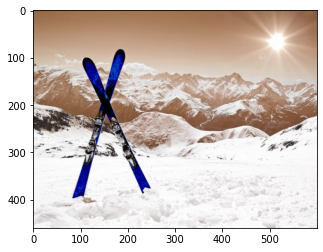

In [121]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [122]:
img_data = img.reshape((-1, 3))

In [123]:
img_data = np.float32(img_data)
img_data.shape

(276000, 3)

In [124]:
df = pd.DataFrame(data = img_data, columns = ['dim1', 'dim2', 'dim3'])
df.head()

,dim1,dim2,dim3
0,143.0,100.0,67.0
1,143.0,100.0,67.0
2,144.0,101.0,68.0
3,144.0,101.0,68.0
4,144.0,101.0,68.0


In [126]:
cv2.kmeans?

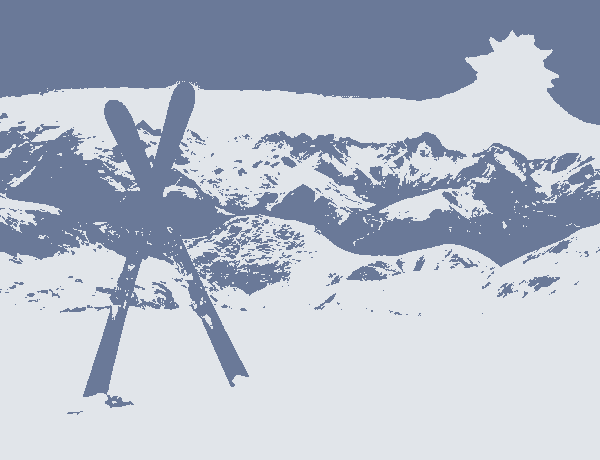

In [128]:
x, label, center = cv2.kmeans(data = img_data, K=2, bestLabels = None, 
                           criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0),
                           attempts = 10, flags = cv2.KMEANS_RANDOM_CENTERS) 
                           # attepts - liczba uruchomień kodu
                           # flags - określenie inicjalizacji centroidów
                           # K - liczba klastrów
                           # data - float32 data type
                           # Kryteria zatrzymania algorytmu (typ, max_iter, eps)

center = np.uint8(center)
res = center[label.flatten()]
res = res.reshape((img.shape))
cv2_imshow(res)

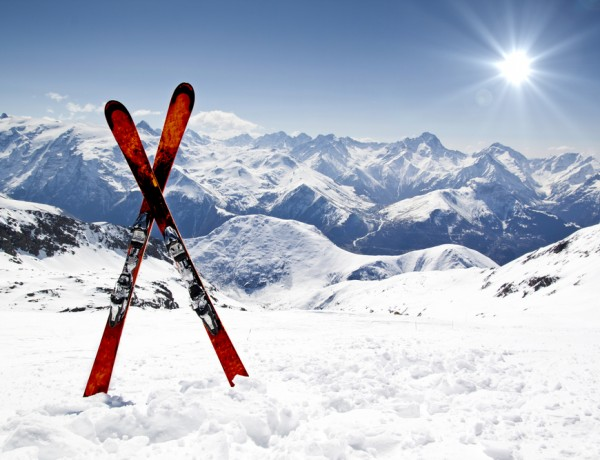

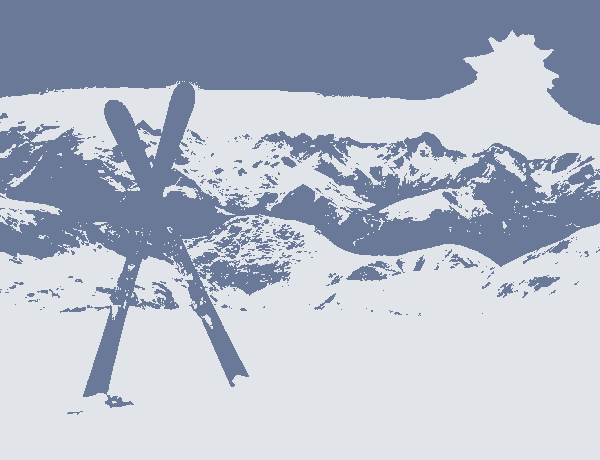

In [129]:
def make_kmeans(n_neighbor = 2, img_name = 'ski.jpg'):
    
    # Wczytanie zdjęcia
    img = cv2.imread(img_name)
    cv2_imshow(img)

    # przygotowanie zdjęcia
    img_data = img.reshape((-1,3))
    img_data = np.float32(img_data)

    # kmeans
    x, label, center = cv2.kmeans(data = img_data, K=2, bestLabels = None, 
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0),
    attempts = 10, flags = cv2.KMEANS_RANDOM_CENTERS) 
    # attepts - liczba uruchomień kodu
    # flags - określenie inicjalizacji centroidów
    # K - liczba klastrów
    # data - float32 data type

    # przygotowanie do wyświetlenia
    center = np.uint8(center)
    res = center[label.flatten()]
    res = res.reshape((img.shape))
    cv2_imshow(res)

make_kmeans()

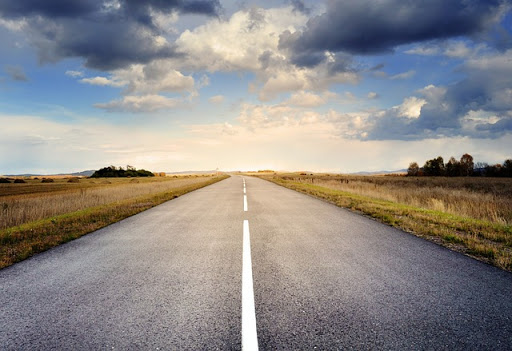

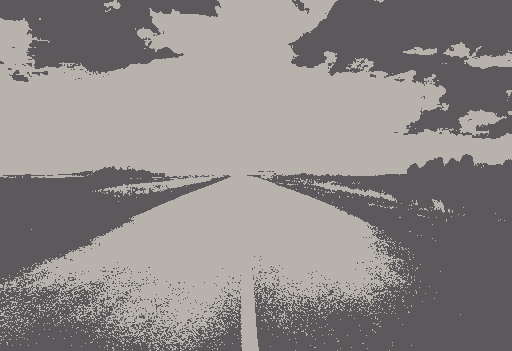

In [130]:
make_kmeans(3, 'view.jpg')

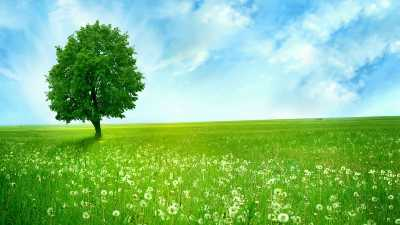

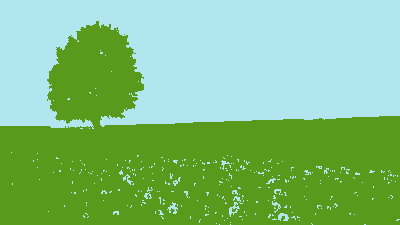

In [131]:
make_kmeans(3, 'green.jpg')

## Case Study III (Zad 27)

In [157]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

np.random.seed(42)

In [158]:
# dane od 22.01.2020 do 17.02.2020
url = 'https://storage.googleapis.com/esmartdata-courses-files/ml-course/coronavirus.csv'
data = pd.read_csv(url, parse_dates=['Date', 'Last Update'])
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22 12:00:00,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,2,2020-01-22 12:00:00,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,3,2020-01-22 12:00:00,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,4,2020-01-22 12:00:00,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,5,2020-01-22 12:00:00,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Sno             1719 non-null   int64         
 1   Date            1719 non-null   datetime64[ns]
 2   Province/State  1257 non-null   object        
 3   Country         1719 non-null   object        
 4   Last Update     1719 non-null   datetime64[ns]
 5   Confirmed       1719 non-null   float64       
 6   Deaths          1719 non-null   float64       
 7   Recovered       1719 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 107.6+ KB


In [160]:
data.isnull().sum()

Sno                 0
Date                0
Province/State    462
Country             0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
dtype: int64

In [161]:
data['Province/State'] = np.where(data['Province/State'].isnull(), data['Country'], data['Province/State'])
data.isnull().sum()

Sno               0
Date              0
Province/State    0
Country           0
Last Update       0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

In [162]:
data.Country.value_counts().nlargest(10)

Mainland China    801
US                188
Australia          84
Canada             59
China              34
Japan              27
Thailand           27
South Korea        27
Singapore          26
Vietnam            26
Name: Country, dtype: int64

In [163]:
data.Country = np.where(data.Country == 'Mainland China', 'China', data.Country)
data.Country.value_counts().nlargest(10)

China          835
US             188
Australia       84
Canada          59
South Korea     27
Japan           27
Thailand        27
Vietnam         26
Hong Kong       26
Macau           26
Name: Country, dtype: int64

In [164]:
tmp = data.Country.value_counts().nlargest(15).reset_index()
tmp.columns = ['Country', 'Count']
tmp.sort_values(by = ['Count', 'Country'], ascending=[False, True])
tmp['iso_alpha'] = ['CHN', 'USA', 'AUS', 'CAN', 'JPN', 'KOR', 'THA', 'HKG', np.nan, 'SGP', 'TWM', 'VNM', 'FRA', 'MYS', 'NPL']
tmp

,Country,Count,iso_alpha
0,China,835,CHN
1,US,188,USA
2,Australia,84,AUS
3,Canada,59,CAN
4,South Korea,27,JPN
5,Japan,27,KOR
6,Thailand,27,THA
7,Vietnam,26,HKG
8,Hong Kong,26,NaN
9,Macau,26,SGP


In [165]:
px.scatter_geo(tmp, locations='iso_alpha', size = 'Count', size_max = 40, template='plotly_dark', color = 'Count',
               text = 'Country', projection = 'natural earth', color_continuous_scale = 'reds', width = 1400, title = 'Liczba przypadków koronawirusa - (z TOP 15 global')

In [166]:
px.scatter_geo(tmp, locations='iso_alpha', size = 'Count', size_max = 40, template='plotly_dark', color = 'Count',
               text = 'Country', projection = 'natural earth', color_continuous_scale = 'reds', scope = 'asia',
               width = 1400, title = 'Liczba przypadków koronawirusa - Azja (z TOP 15 global')

In [167]:
px.bar(tmp, x = 'Country', y = 'Count', template='plotly_dark', width  = 1400, color_discrete_sequence=['#42f5c8'],
       title = 'Liczba przypadków Koronawirusa w rozbiciu na kraje')

In [168]:
px.bar(tmp.where(tmp.Country != "China"), x = 'Country', y = 'Count', template='plotly_dark', width  = 1400, color_discrete_sequence=['#42f5c8'],
       title = 'Liczba przypadków Koronawirusa w rozbiciu na kraje')

In [169]:
tmp = data.groupby(by = data['Date'].dt.date)[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
tmp

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,555.0,0.0,0.0
1,2020-01-23,653.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0
3,2020-01-25,2019.0,56.0,49.0
4,2020-01-26,2794.0,80.0,54.0
5,2020-01-27,4473.0,107.0,63.0
6,2020-01-28,6057.0,132.0,110.0
7,2020-01-29,7783.0,170.0,133.0
8,2020-01-30,9776.0,213.0,187.0
9,2020-01-31,11374.0,259.0,252.0


In [170]:
fig = go.Figure()

trace1 = go.Scatter(x = tmp['Date'], y = tmp.Confirmed, mode = 'markers+lines', name = 'Confirmed')
trace2 = go.Scatter(x = tmp['Date'], y = tmp.Deaths, mode = 'markers+lines', name = 'Deaths')
trace3 = go.Scatter(x = tmp['Date'], y = tmp.Recovered, mode = 'markers+lines', name = 'Recovered')

fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3)

fig.update_layout(template = 'plotly_dark', width = 1400, title = 'Koronawirus do 17.02.2020')

In [171]:
data_confirmed = tmp[['Date', 'Confirmed']]
data_confirmed.columns = ['ds', 'y']
data_confirmed.head()

,ds,y
0,2020-01-22,555.0
1,2020-01-23,653.0
2,2020-01-24,941.0
3,2020-01-25,2019.0
4,2020-01-26,2794.0


In [173]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_confirmed.ds, y = data_confirmed.y, mode = 'markers+lines', name = 'Confirmed', fill = 'tozeroy'))
fig.update_layout(template = 'plotly_dark', width=1400, title = 'Liczba powietrdzionych przypadków do 12.02.2020')

In [175]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
model.fit(data_confirmed)

future = model.make_future_dataframe(periods=7, freq = 'D')
forecast = model.predict(future)
plot_plotly(model, forecast)

INFO:fbprophet:n_changepoints greater than number of observations. Using 20.
